In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
# Read dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.isnull().any()


User ID            False
Gender             False
Age                 True
EstimatedSalary     True
Purchased          False
dtype: bool

In [46]:
print(dataset)

      User ID  Gender   Age  EstimatedSalary Purchased
0    15624510    Male  19.0          19000.0        No
1    15810944    Male  35.0          20000.0        No
2    15668575  Female  26.0          43000.0        No
3    15603246  Female  27.0          57000.0        No
4    15804002    Male  19.0          76000.0        No
..        ...     ...   ...              ...       ...
395  15691863  Female  46.0          41000.0       Yes
396  15706071    Male   NaN          23000.0       Yes
397  15654296  Female  50.0          20000.0       Yes
398  15755018    Male  36.0          33000.0        No
399  15594041  Female  49.0          36000.0       Yes

[400 rows x 5 columns]


In [49]:
dataset = dataset.dropna(axis='rows')
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [50]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [54]:
# Mengubah value label "Purchase" ke dalam bentuk matriks menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1]


In [55]:
# Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [56]:
# Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [58]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  3]
 [ 6 24]]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31232\2213625725.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


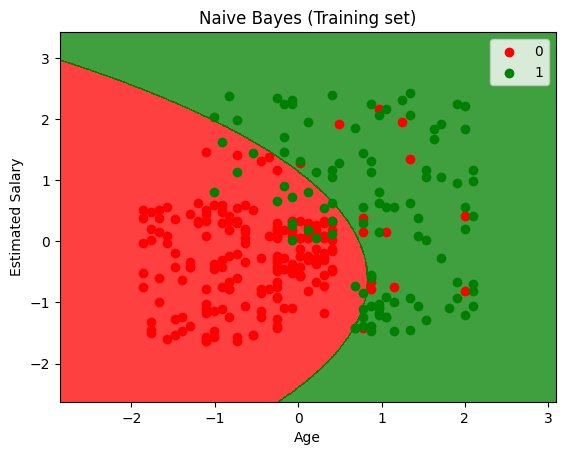

In [60]:
# Visualize
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], 
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31232\3899687041.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


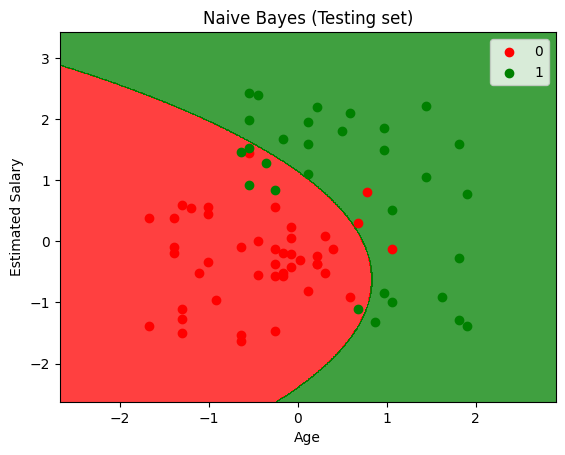

In [61]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], 
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()